In [1]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#Things to talk about
#Goals scored/game, Goals conceded/game, possesion, clean sheets, shots, shots on target
#https://en.wikipedia.org/wiki/List_of_Leicester_City_F.C._seasons
#Is this a one time thing or is Leicester destined for greatness?
#Could they win the league this season?

#data = pd.read_csv("premier_league_stats.csv") 
#data.head()

In [2]:
#Gathering data
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16//table.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'})

#W/D/L Home, Away, and Overall
league_data = BeautifulSoup(r.content).find('table')
league_table = pd.read_html(league_data.prettify())
league_df = pd.DataFrame(league_table[0])

#posession
url = 'https://fbref.com/en/comps/9/1467/possession/2015-2016-Premier-League-Stats'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
data = BeautifulSoup(r.content).find('table')
#print(r.content)
table = pd.read_html(data.prettify())
possession_df = pd.DataFrame(table[0])

#Defensive stats
#Goal against, goal against / game, clean sheets
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16/best-defence.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
defensive_data = BeautifulSoup(r.content).find('table')
#print(r.content)
defensive_table = pd.read_html(defensive_data.prettify())
defensive_df = pd.DataFrame(defensive_table[0])

"""
#attacking stats
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16/best-attack.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
attacking_data = BeautifulSoup(r.content).find('table')
#print(r.content)
attacking_table = pd.read_html(attacking_data.prettify())
attacking_df = pd.DataFrame(attacking_table[0])
print(attacking_df)
"""


"\n#attacking stats\nurl = 'https://www.sportsmole.co.uk/football/premier-league/2015-16/best-attack.html'\nr = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})\nattacking_data = BeautifulSoup(r.content).find('table')\n#print(r.content)\nattacking_table = pd.read_html(attacking_data.prettify())\nattacking_df = pd.DataFrame(attacking_table[0])\nprint(attacking_df)\n"

In [3]:
#Tidying up data
#This tables has entire columns of NaN. This is not missing data.
#Columns seemed to have been added when interpreting the table. We will remove all NaN.
#Removing the first row because it is redundant
league_df = league_df.drop([0, 1])
league_df = league_df.reset_index(drop=True)
league_df = league_df.dropna(how='all', axis=1)

#Here we will rename the columns because currently they are not helpful
#The columns are
#Position, Team, Games played, 
#Home wins, Home draws, Home defeats, Home goals scored, Home goals conceded,
#Away wins, Away draws, Away defeats, Away goals scored, Away goals conceded,
#Total wins, Total draws, Total defeats, Total goals scored, Total goals conceded,
#Goal difference, Points
league_df = league_df.rename(columns={0: 'Position', 1: 'Team', 2: 'Games played', \
                                      4: 'Home wins', 5: 'Home draws', 6: 'Home defeats', 7: 'Home goals scored', 8: 'Home goals conceded', \
                                      10: 'Away wins', 11: 'Away draws', 12: 'Away defeats', 13: 'Away goals scored', 14: 'Aways goals conceded', \
                                     16: 'Total wins', 17: 'Total draws', 18: 'Total defeats', 19: 'Total goals scored', 20: 'Total goals conceded', \
                                     22: 'Goal Difference', 23: 'Points'})
print(league_df)


   Position                             Team Games played Home wins  \
0         C        Leicester City  Leicester           38        12   
1         2                          Arsenal           38        12   
2         3         Tottenham Hotspur  Spurs           38        10   
3         4        Manchester City  Man City           38        12   
4         5       Manchester United  Man Utd           38        12   
5         6                      Southampton           38        11   
6         7        West Ham United  West Ham           38         9   
7         8                        Liverpool           38         8   
8         9                Stoke City  Stoke           38         8   
9        10                          Chelsea           38         5   
10       11                          Everton           38         6   
11       12            Swansea City  Swansea           38         8   
12       13                          Watford           38         6   
13    

In [4]:
possession_df = possession_df.drop([0, 1])
possession_df = possession_df.reset_index(drop=True)
possession_df = possession_df.dropna(how='all', axis=1)

possession_df = possession_df.drop(possession_df.index[0:18])
possession_df = possession_df.reset_index(drop=True)

possession_df.columns = possession_df.columns.get_level_values(1)
possession_df = possession_df.rename(columns={'Squad': 'Team'})
print(possession_df)

               Team  # Pl  Poss   90s
0           Arsenal    25  58.3  38.0
1       Aston Villa    29  46.4  38.0
2       Bournemouth    28  51.2  38.0
3           Chelsea    28  56.2  38.0
4    Crystal Palace    30  45.8  38.0
5           Everton    31  51.9  38.0
6    Leicester City    23  42.6  38.0
7         Liverpool    34  57.2  38.0
8   Manchester City    25  56.9  38.0
9    Manchester Utd    33  58.5  38.0
10    Newcastle Utd    31  46.6  38.0
11     Norwich City    28  46.0  38.0
12      Southampton    26  49.2  38.0
13       Stoke City    27  49.7  38.0
14       Sunderland    31  41.0  38.0
15     Swansea City    27  52.5  38.0
16        Tottenham    24  57.4  38.0
17          Watford    25  45.1  38.0
18        West Brom    28  39.8  38.0
19         West Ham    28  48.4  38.0


In [5]:
defensive_df = defensive_df.drop([0])
defensive_df = defensive_df.reset_index(drop=True)

defensive_df = defensive_df.drop(columns=[0])
defensive_df = defensive_df.rename(columns={1: 'Team', 2: 'Goals against', 3: 'Goals conceded per game', 4: 'Clean sheets'})

print(defensive_df)

                    Team Goals against Goals conceded per game Clean sheets
0      Manchester United            35                    0.92           18
1      Tottenham Hotspur            35                    0.92           13
2                Arsenal            36                    0.95           18
3         Leicester City            36                    0.95           15
4        Manchester City            41                    1.08           16
5            Southampton            41                    1.08           12
6   West Bromwich Albion            48                    1.26           11
7              Liverpool            50                    1.32           11
8                Watford            50                    1.32           11
9         Crystal Palace            51                    1.34            8
10       West Ham United            51                    1.34           11
11          Swansea City            52                    1.37            9
12          

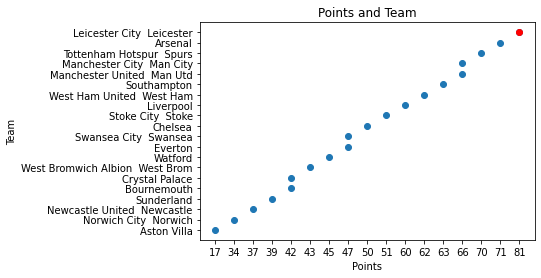

In [18]:
#confirm that Leicester is the winning team
fig, ax = plt.subplots()
#What are you doing in the line below?
league_df.sort_values(by=['Points'], inplace=True)
ax.scatter(x=league_df['Points'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Points'], y=lc['Team'], c='red')
plt.title("Points and Teams")
plt.xlabel("Points")
plt.ylabel("Team")
plt.show()

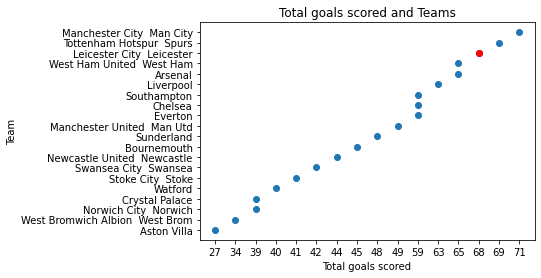

In [19]:
#Check number of goals scored
fig, ax = plt.subplots()
league_df.sort_values(by=['Total goals scored'], inplace=True)
ax.scatter(x=league_df['Total goals scored'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Total goals scored'], y=lc['Team'], c='red')
plt.title("Total Goals Scored and Teams")
plt.xlabel("Total Goals Scored")
plt.ylabel("Team")
plt.show()

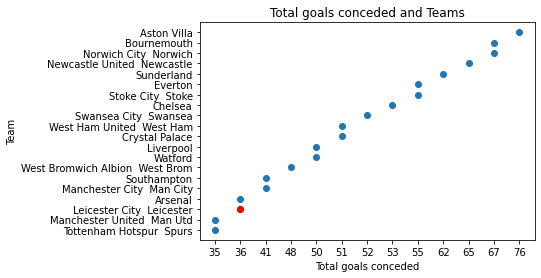

In [20]:
#Check number of goals scored
fig, ax = plt.subplots()
league_df.sort_values(by=['Total goals conceded'], inplace=True)
ax.scatter(x=league_df['Total goals conceded'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Total goals conceded'], y=lc['Team'], c='red')
plt.title("Total Goals Conceded and Teams")
plt.xlabel("Total Goals Conceded")
plt.ylabel("Team")
plt.show()

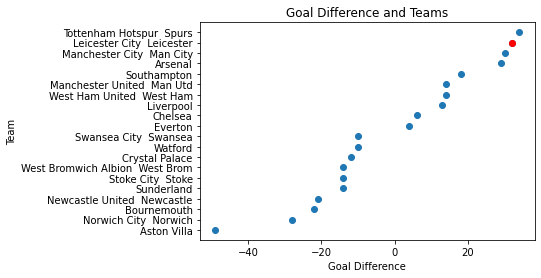

In [22]:
#Check goal difference
#league_df['Goal Difference'] is a string, needs to be an int or it will mess with the graph
for index, row in league_df.iterrows():
    league_df['Goal Difference'][index] = int(row['Goal Difference'])
fig, ax = plt.subplots()
league_df.sort_values(by=['Goal Difference'], inplace=True)
ax.scatter(x=league_df['Goal Difference'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Goal Difference'], y=lc['Team'], c='red')
plt.title("Goal Difference and Teams")
plt.xlabel("Goal Difference")
plt.ylabel("Team")
plt.show()